# Анализ рынка видеоигр (Сборный проект 1)

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Загрузка данных и изучние общей информации

### Загрузкка библиотек и данных

Импортируем все библиотеки, которые будем использовать в проекте.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

import os

In [60]:
# убираю scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Загрузим датасет и выведим на экран sammple()

In [61]:
#df = pd.read_csv('/Users/macbookpro/Desktop/Yandex_Practicum/Project_1/datasets/games.csv')

if os.path.exists(r'C:\Users\Roma\Desktop\projects\video_game_market_analysis\games.csv'):
    df = pd.read_csv(r'C:\Users\Roma\Desktop\projects\video_game_market_analysis\games.csv')
elif os.path.exists(r'/datasets/games.csv'):
    df = pd.read_csv('/datasets/games.csv')
else:
    print('Ошибка в пути файла')

In [62]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3387,Medal of Honor: Frontline,GC,2002.000,Shooter,0.460,0.120,0.000,0.020,80.000,7.9,T
1289,Tom Clancy's Splinter Cell: Pandora Tomorrow,XB,2004.000,Action,0.820,0.590,0.000,0.070,93.000,8.6,T
6824,The Simpsons: Road Rage,GC,2001.000,Racing,0.190,0.050,0.000,0.010,67.000,7.7,T
6521,Spider-Man: Web of Shadows,PS3,2008.000,Action,0.200,0.040,0.000,0.020,67.000,7.9,T
2789,The Amazing Spider-Man (Console Version),X360,2012.000,Action,0.430,0.240,0.000,0.060,NaN,NaN,NaN
2735,Tony Hawk's Underground 2,XB,2004.000,Sports,0.480,0.240,0.000,0.030,83.000,7.8,T
8039,Chocobo no Fushigi Dungeon for WonderSwan,WS,1999.000,Role-Playing,0.000,0.000,0.180,0.000,NaN,NaN,NaN
16444,Idol Janshi Suchie-Pai IV,PS2,2007.000,Misc,0.000,0.000,0.010,0.000,NaN,NaN,NaN
9681,Fire ProWrestling S: 6Men Scramble,SAT,1996.000,Fighting,0.000,0.000,0.120,0.000,NaN,NaN,NaN
9961,Lunar 2: Eternal Blue,SAT,1998.000,Role-Playing,0.000,0.000,0.120,0.000,NaN,NaN,NaN


Посмотрим на уникальные значения рейтинга пользователей и критиков

In [63]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [64]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмоторим на гистограммы для значений

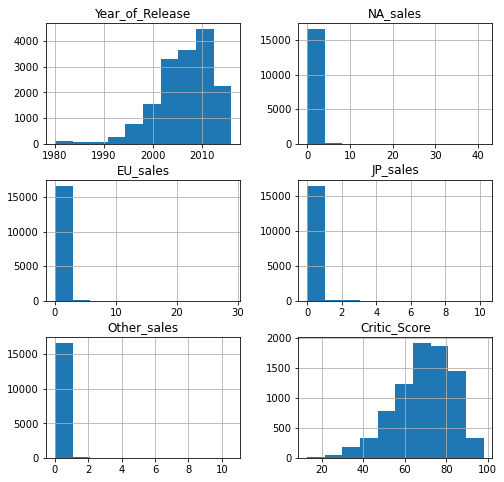

In [66]:
df.hist(figsize=(8,8))
plt.show()

## Шаг 2. Подготовка данных

### Изменение названий столбцов

Посмотрим на названия столбцов

In [67]:
df.columns.values.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Названия всх столбцов содержат как строчные так и заглавные буквы. Приведем столбцы к виду, где все буквы будут строчными. 

In [68]:
# Используем функцию map(), которая позволит применить str.lower ко всем названием столбцов
df.columns = map(str.lower, df.columns)

Проверим названия столбцов

In [69]:
df.columns.values.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

Теперь названия столбцов содержат только строчные буквы.

### Преобразование типов данных

Посмотрим на типы данных в столбцах

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим значения в столбце 'user_score'. Выведем на экран список уникальных значний для каждого столбца.

In [71]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Предлагаю назначить столбцу 'user_score' числовой формат float.Однако есть проблема - в столбце присутствуют текстовые значения '**tbd**'.
После [поиска в интернете](https://www.metacritic.com/faq) стало ясно, что **tbd**  означает - '**To Be Determined**'. Так могут обозначаться игры, которые не набрали достаточно оценок, чтобыы сформировать итоговый рейтинг.
Получается, что '**tbd**' - означает отсутствие рейтинга, следовательно это значение можно заменить на **Nan**. Этот шаг может показаться контр интуитивным, но заменив эти строковые значния на **NaN**, мы получим возможность привести значения столбца к типу **float**, что сделает работу с ним намного удобнее.

In [72]:
# замниим значния 'tbd' на NaN и изменим формат данных на float
df['user_score'] = df['user_score'].replace('tbd', np.NaN).astype('float')

### Обработка пропусков

Посмотрим на количество пропусков

In [73]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Проверим количество пропусков в процентах

In [74]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Пропуски в namename, year_of_release и genre можно сразу удалить, их очень мало и это не должно повлиять на набор данных

In [75]:
df.dropna(how='any', subset = ['name'], inplace=True)

In [76]:
df.dropna(how='any', subset = ['year_of_release'], inplace=True)

Изменим тип данных в столбце year_of_release на int так как у нас отображаются только целые года, дробная часть всех значений в столбцеравна нулю

In [77]:
df['year_of_release'] = df['year_of_release'].astype('int')

С остальными пропусками сложнее, отсутствующие значения в столбцах '**critic_score**', '**user_score**', '**rating**', составляют до 51% от всего датасета. Удалять их не стоит т.к. это слишком большая доля значений.

Заполнять средними или медийными значениями в данной ситуации тоже будет ошибкой т.к. это сильно исказит картину. 

Я предлагаю заполнить пропуски в '**critical_score**' значением-заглушкой, например -1. Такое значение не встречается ни у одной игры, его легко можно будет отфильтровать, если это потребуется. Также заменим формат на 'int' т.к. все оценки - это целые числа.

Для столбца '**user_score**' поступим аналогичным образом, замени пропуски на -1.

В случае со столбцом '**rating**' - мы также не можем определить рейтинг для игр, для которых он не указан. Предлагаю заменить пропуски на значение no_rating

In [78]:
df['critic_score'] = df['critic_score'].fillna(-1).astype('int')

df['user_score'] = df['user_score'].fillna(-1)

df['rating'] = df['rating'].fillna('no_rating')

Проверим пропуски еще раз

In [79]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Таким образом у нас не осталось пропусков в датасете. Это упростит фильтрацию и работу с данными в целом.

### Пдсчет суммарных продаж во всех регионах

Посчитаем суммарны продажи для разных регионов. Запишим получившиеся значения в новый столбец - '**total_sales**'

In [80]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Выведем на экран датасет с новым столбцом.

In [81]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8147,EyeToy: Groove,PS2,2003,Misc,0.090,0.070,0.000,0.020,73,8.000,E,0.180
5159,Need for Speed: The Run,PC,2011,Action,0.090,0.210,0.000,0.070,69,5.800,T,0.370
9215,Star Wars: Jedi Power Battles,GBA,2002,Action,0.100,0.040,0.000,0.000,58,-1.000,T,0.140
15004,Room Zoom: Race for Impact,XB,2004,Racing,0.020,0.010,0.000,0.000,-1,-1.000,no_rating,0.030
11967,Homie Rollerz,DS,2008,Racing,0.070,0.000,0.000,0.010,23,2.400,E,0.080


## Шаг 3. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

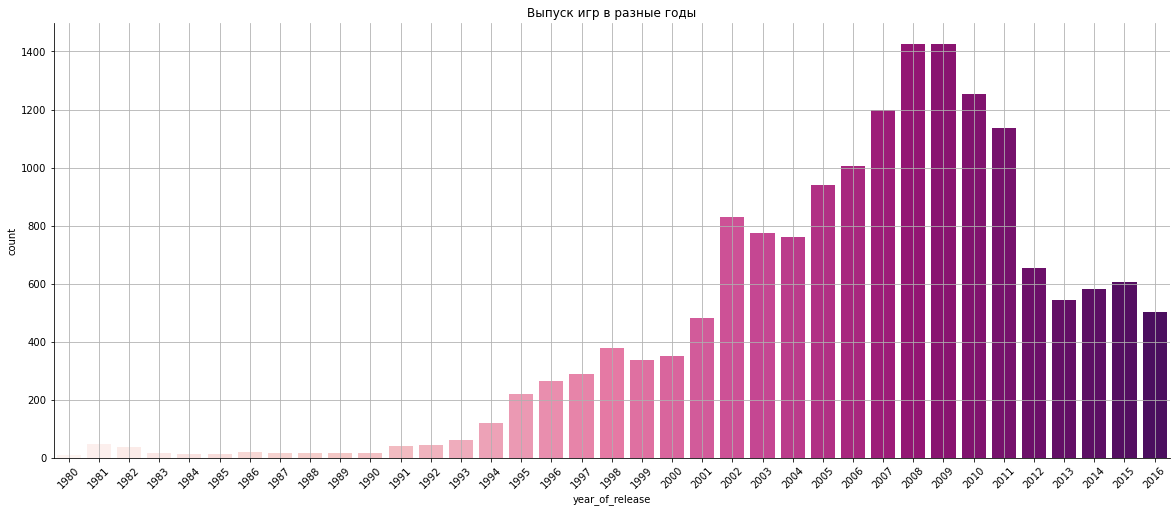

In [82]:
# сгрупперуем данные по году выпуска
yearly_relise_graph = df.pivot_table(index='year_of_release', \
                                     values='total_sales', \
                                     aggfunc='count')

yearly_relise_graph.columns = ['count']

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x = yearly_relise_graph.index, y = 'count', data = yearly_relise_graph, palette= 'RdPu')
plt.title('Выпуск игр в разные годы')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

Проанализирровав график, мы можем сделать следующие выводы:
- до 1994 года выпускалось крайне мало игр
- пик количества выпущенных игр пришелся на 2008 и 2009 года
- после 2011 года можно наблюдать резкий спад
- несмотря на незначительный рост в 2014 и 2015 годах, в 2016 все равно наблюдается спад количества выпущенных игр

Чем может быть вызвана такая картина? 

В 1994 было выпущено множество игровых платформ ([источник](https://en.wikipedia.org/wiki/1994_in_video_games#Hardware_releases)). Появление новых платформ и их популярность привели к увеличению количества производимых игр. Основываясь на этом, мы будем использовать в исследовании только данные после 1994 года включительно.

### Посмотрим, как менялись продажи по платформам

#### Платформы с наибольшими суммарными продажами

Проведем анализ продаж игр по платформам. На графике бует отображаться количество проданых игр за весь период наблюдений.

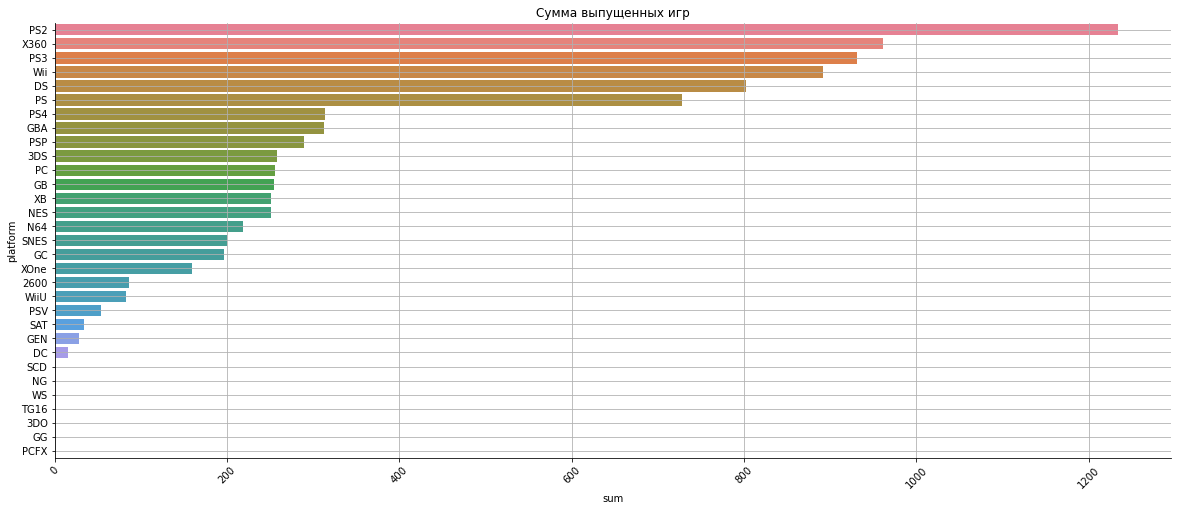

In [83]:
# делаем все тоже самое, что и для графика по годам
# сгруппируем данные платформе
platform_relise_graph = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_relise_graph.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_relise_graph = platform_relise_graph.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (20, 8))
ax = sns.barplot(x = 'sum', y =platform_relise_graph.index, \
                 data = platform_relise_graph, \
                 orient = 'h', palette = 'husl')
plt.title('Сумма выпущенных игр')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

# вопрос к куратору - как отсортировать данные прямо в коде создания графика? Пробовал через order, но почему-то не получилось

На графике видно, что больше всго игр выпустили для:
- PS2
- X360 (имеется в виду X-Box 360)
- PS3
- Wii
- DS

### Характерный срок появления и исчезнавения платформ

Теперь посмотрим на динамику продаж игр на топовых платформах по годам.

Для начала, выделим названия ТОП 5 платформ, которые мы опредили ранее в список

In [84]:
# Выведем первые 10 строк фрейма, который мы использовали для построения графика суммарного количества релизов по платформам
platform_relise_graph.head(5)
top_platforms_condition = list(platform_relise_graph.head(5).index.values)

top_platforms_condition

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Этот список будем использовать для фильтрации данных в дальнейшем

Теперь подготовим датасет для построения графика продаж по платформам

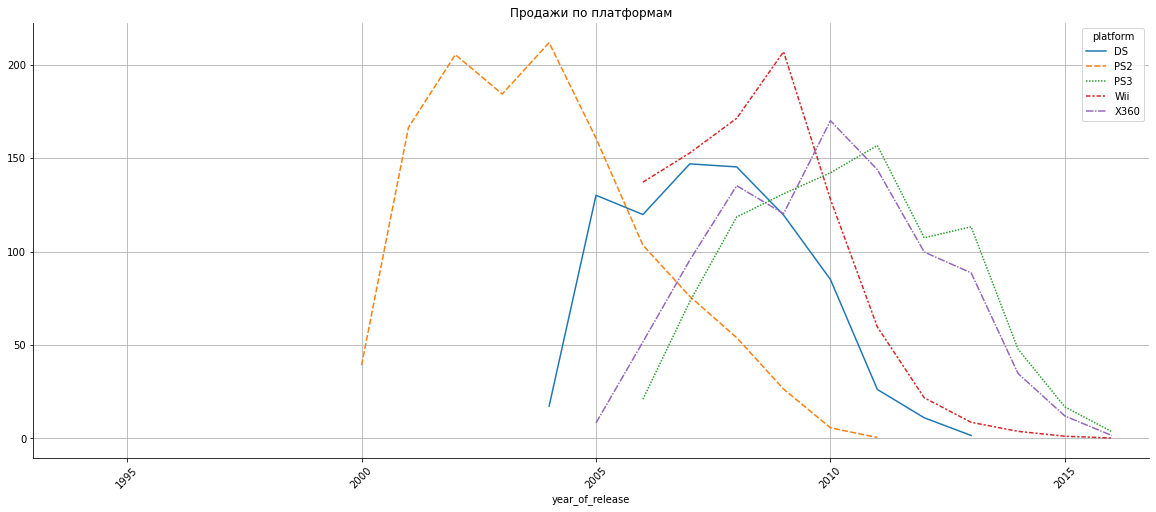

In [85]:
# выделим топовые платформы, учтем и то, что мы берем данные не раньше 1994 года

top_platforms = df[(df['year_of_release'] >= 1994) & (df['platform'].isin(top_platforms_condition))]


# теперь преобразуем новый датафрейм для построения графика
top_platforms_graph = top_platforms.pivot_table(index = 'year_of_release', \
                                                columns = 'platform', \
                                                values = 'total_sales', \
                                                aggfunc = 'sum')

plt.figure(figsize = (20, 8))
sns.lineplot(data = top_platforms_graph, palette = "tab10", linewidth = 1.5)
plt.title('Продажи по платформам')
plt.xlim(1993, None)
plt.xticks(rotation = 45)
sns.despine()
plt.grid()
plt.show()


# Вопрос, как сделать ось Х более наглядной? Пытался увеличить число тиков через xticks но не получилось

На графике мы можем наблюдать жизненный цикл платформ:
- **PS2** - платформа появилась в 2000, достигла пика своей популярности в районе 2003 - 2005 годов, после чего, количество выпускаемых игр начало падать
- **X360** - платформа появилась в 2005 году, пик количества релизов пришелся на 2010 год
- **PS3** - Платформа появилась в 2005 году, пик популярности пришелся на 2010 год
- **Wii** - Появилась в 2005 году. Мы можем наблюдать, что на момент релиза, у платформы уже было достаточно много игр (больше 100), у все остальных платформ, на момент релиза было не более 50 доступных игр.
- **DS** - появилась в 2004 году, пик релизов пришелся на 2007 - 2008 годы. Прекратились релизы примерно в 2013 году

Глядя на график, можно сделать вывод, что консоли могут жить около 10 - 15 лет

### Прогноз на 2017 год

**Задание для этого шага сформулировано следующим образом:**

"Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы."

Опираясь на график из предыдущего анализа, можно сделать вывод, что актуальный период анализа начинается с 2005 года т.к. большое число релизов на все топовые платформы пришлось на период с 2005 года.

Построим график релизов по годам для топа платформ, но уже за принятый нами актуальный период

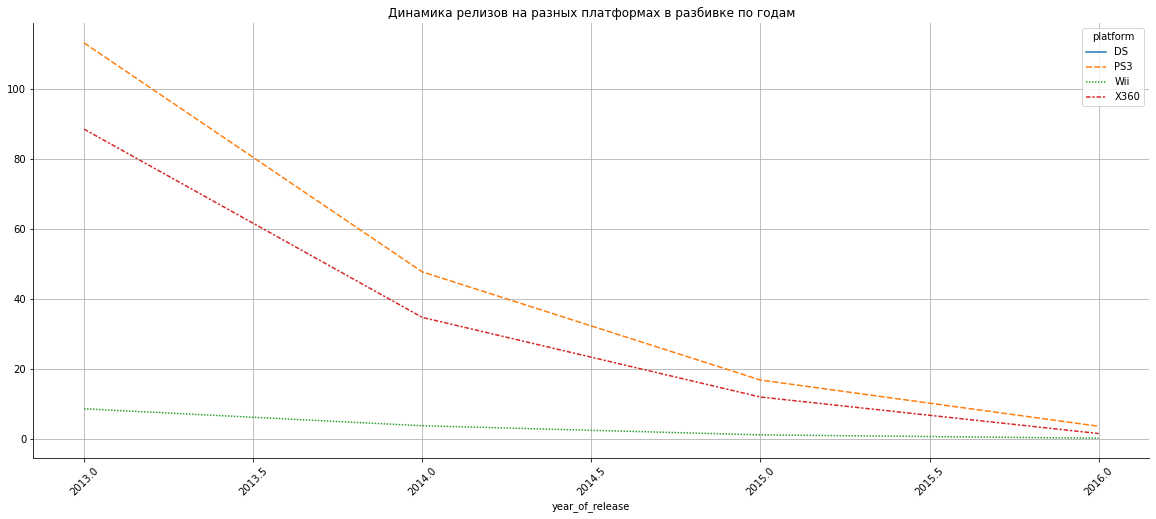

In [86]:
top_platforms_period = df[(df['year_of_release'] >= 2013) & (df['platform'].isin(top_platforms_condition))]


# теперь преобразуем новый датафрейм для построения графика
top_platforms_period_graph = top_platforms_period.pivot_table(index = 'year_of_release', \
                                                columns = 'platform', \
                                                values = 'total_sales', \
                                                aggfunc = 'sum')

plt.figure(figsize = (20, 8))
sns.lineplot(data = top_platforms_period_graph, palette = "tab10", linewidth=1.5)
plt.title('Динамика релизов на разных платформах в разбивке по годам')
#plt.xlim(2014, None)
plt.xticks(rotation = 45)
sns.despine()
plt.grid()
plt.show()

### Какие платформы лидируют по продажам, растут или падают?

Построим еще один график, используем тот же подход, что и для графика с продажами по годам, только увеличим число отображаемых платформ и скорректируем актуальный период

In [87]:
platforms_leaderboard = df[df['year_of_release'] >= 2013].pivot_table(
    index='platform', values='total_sales', aggfunc='sum')
platforms_leaderboard.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platforms_leaderboard = platforms_leaderboard.sort_values('sum', ascending = False)
platforms_leaderboard = platforms_leaderboard.head(10)

platforms_leaderboard_condition = list(platforms_leaderboard.index.values)

Построим график. Приблизим график по оси Х, чтобы было проще определить, какие платформы лидируют.

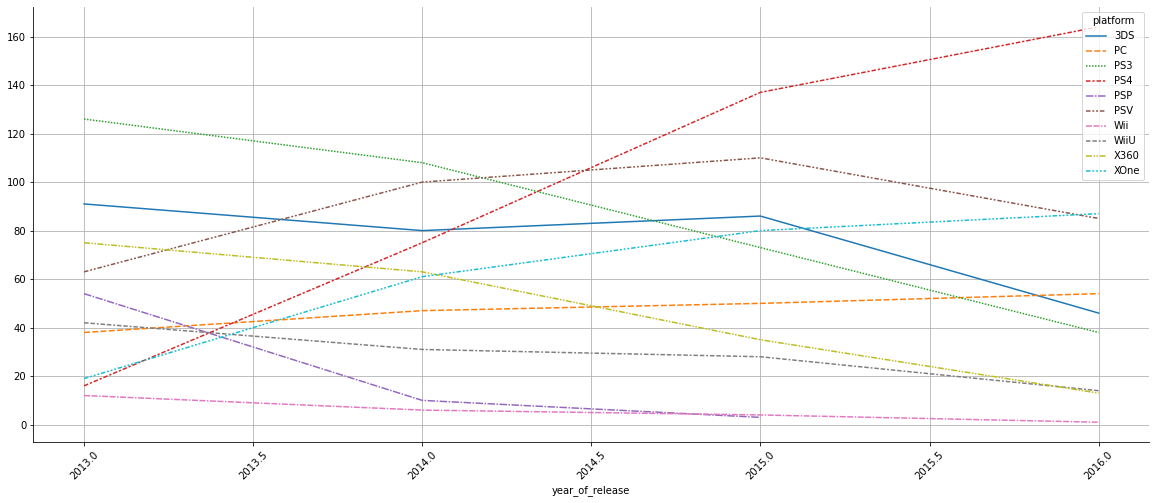

In [88]:
top_platforms_leaderboard = df[(df['year_of_release'] >= 2013) & 
                               (df['platform'].isin(platforms_leaderboard_condition))]


# теперь преобразуем новый датафрейм для построения графика
top_platforms_leaderboard_graph = top_platforms_leaderboard.pivot_table(index = 'year_of_release', \
                                                columns = 'platform', \
                                                values = 'total_sales', \
                                                aggfunc = 'count')

plt.figure(figsize = (20, 8))
sns.lineplot(data = top_platforms_leaderboard_graph, palette = "tab10", linewidth=1.5)
# приблизим график по оси Х
#plt.xlim(2012, None)
plt.xticks(rotation = 45)
sns.despine()
plt.grid()
plt.show()

На конец 2016 года, лидируют следующие платформы:
- PS4
- PC
- XOne


### Boxplot по глобальным продажам игр в разбивке по платформам

Построим boxplot по продажам за выбраный нами актуальный период (т.е. для игр, выпущенных в 2013 году и позднее)

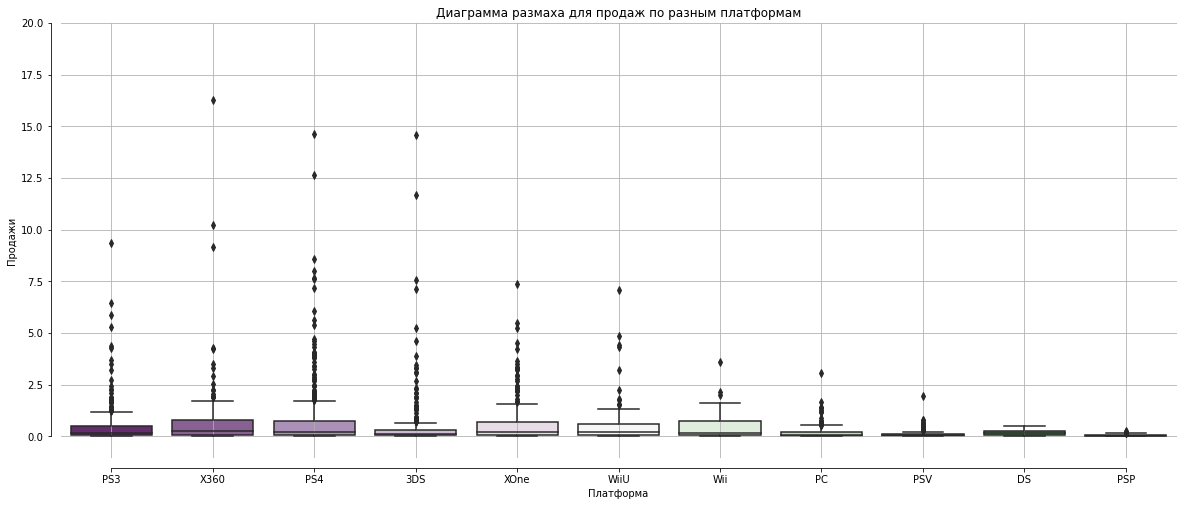

In [89]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df[(df['year_of_release'] >= 2013)], y = 'total_sales', x='platform', palette='PRGn',)
plt.title('Диаграмма размаха для продаж по разным платформам')
plt.ylim(None, 20)
plt.ylabel('Продажи')
plt.xlabel('Платформа')
sns.despine(offset=10, trim=True)
plt.grid()
plt.show() 

Построим график для платформ, лидирующих на конец 2016 года

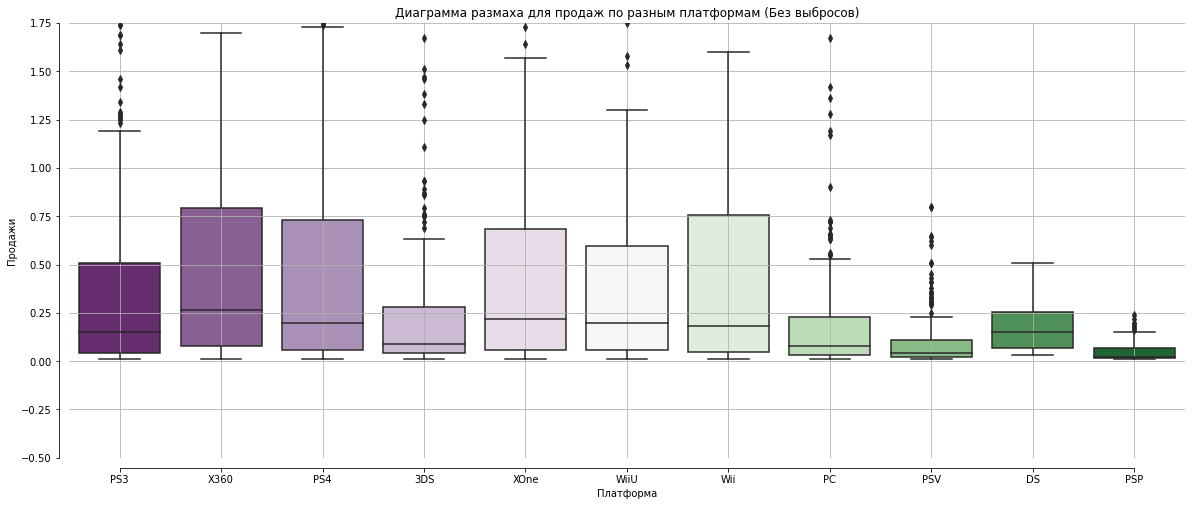

In [90]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df[(df['year_of_release'] >= 2013)], y = 'total_sales', x='platform', palette='PRGn',)
plt.title('Диаграмма размаха для продаж по разным платформам (Без выбросов)')
plt.ylim(-0.5, 1.75)
plt.ylabel('Продажи')
plt.xlabel('Платформа')
sns.despine(offset=10, trim=True)
plt.grid()
plt.show() 

Вывод, медиана для трех топовых платформ варьируется от 0.1 до 0.25.
Консоли XboxOne (на графике отмечен как 'XOne') и PS4 показывают схожую картину по медиане, и размаху. Такую же картину можно было наблюдать и ранее между PS3 и X360.

### Влияние отзывов пользователей и критиков на продажи популярных платформ


Здесь поступим также, как и в задании выше, возьмем для анализа топовые платформы и отдельно рассмотрим ТОП 3 на конец 2016.

* Важное замечание, ранее мы заполнили пропуски в значениях рейтинга -1. Необходимо будет указать это при фильтрации данных, чтобы не исказить результат

In [91]:
top_platforms_rating_plot = df[(df['year_of_release'] >= 2013) & 
                              (df['user_score'] >= 0) & 
                              (df['critic_score'] >= 0) & 
                              (df['platform'].isin(platforms_leaderboard_condition))]

Построим для график для основных платформ для показателя **user_score**

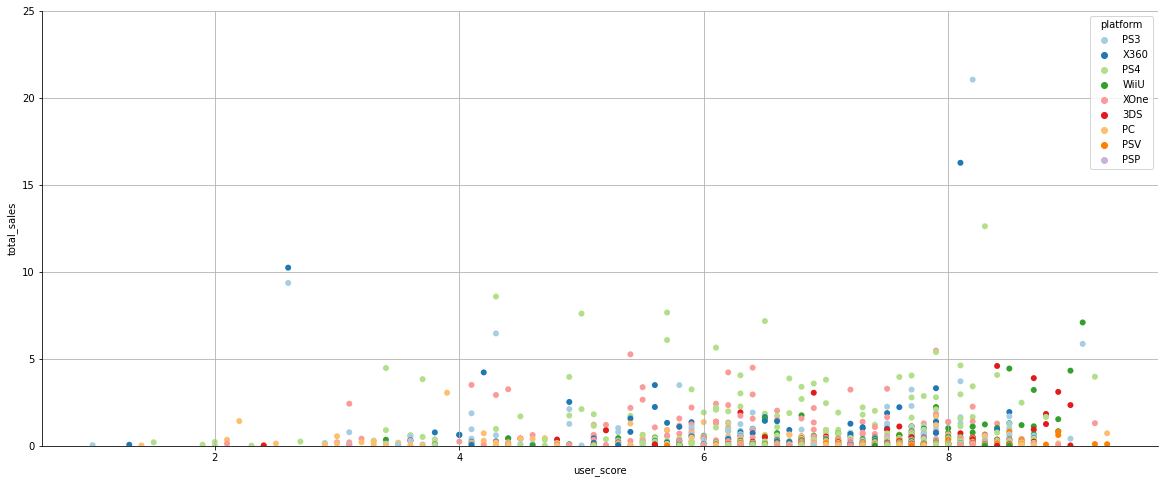

In [92]:
plt.figure(figsize = (20, 8))
sns.scatterplot(x = "user_score", y = "total_sales",
                hue = "platform",
                palette = "Paired",
                sizes = (1, 8), linewidth = 0,
                data = top_platforms_rating_plot)
plt.ylim(0, 25)
sns.despine()
plt.grid()
plt.show() 

Построим для график для основных платформ для показателя **critic_score**

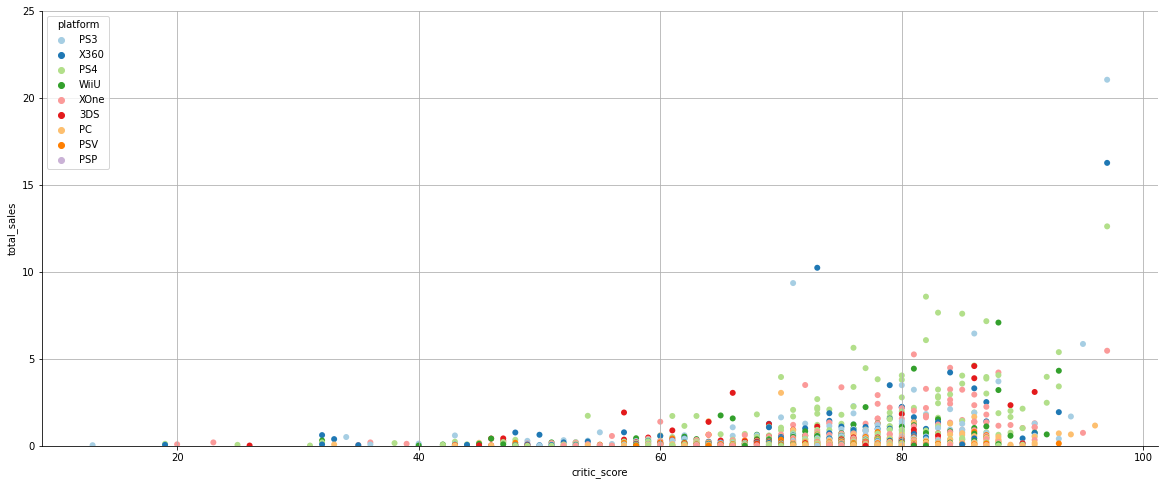

In [93]:
plt.figure(figsize = (20, 8))
sns.scatterplot(x = "critic_score", y = "total_sales",
                hue = "platform",
                palette = "Paired",
                sizes = (1, 8), linewidth = 0,
                data = top_platforms_rating_plot)
plt.ylim(0, 25)
sns.despine()
plt.grid()
plt.show() 

Рассмотрим отдельно платформы PS4, PC, XOne

Построим график для трех платформ по показателю **user_score**

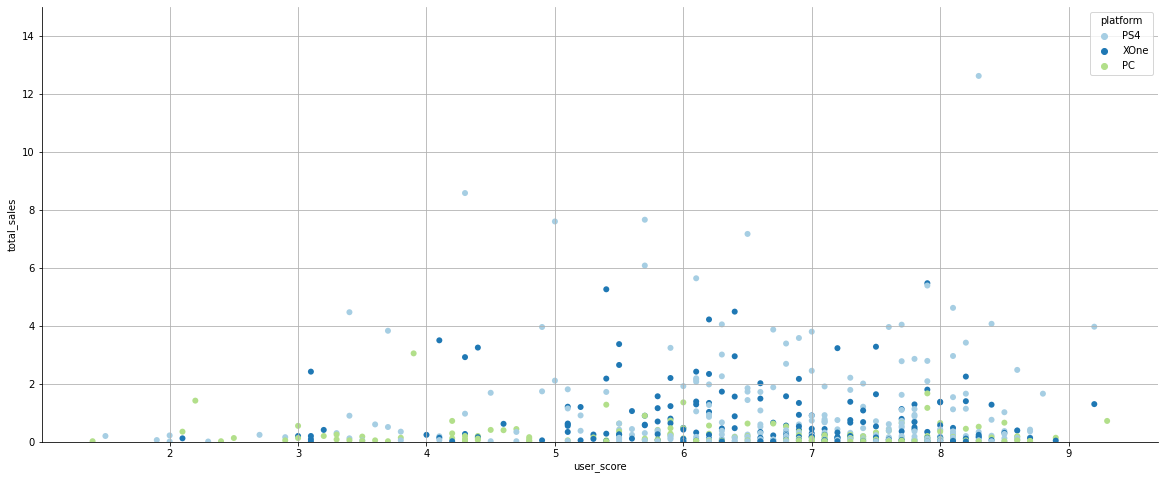

In [94]:
plt.figure(figsize = (20, 8))
sns.scatterplot(x = "user_score", y = "total_sales",
                hue = "platform",
                palette = "Paired",
                sizes = (1, 8), linewidth = 0,
                data = top_platforms_rating_plot[top_platforms_rating_plot['platform'].isin(['PS4','PC','XOne'])])
plt.ylim(0, 15)
sns.despine()
plt.grid()
plt.show() 

Построим график для трех платформ по показателю **critic_score**

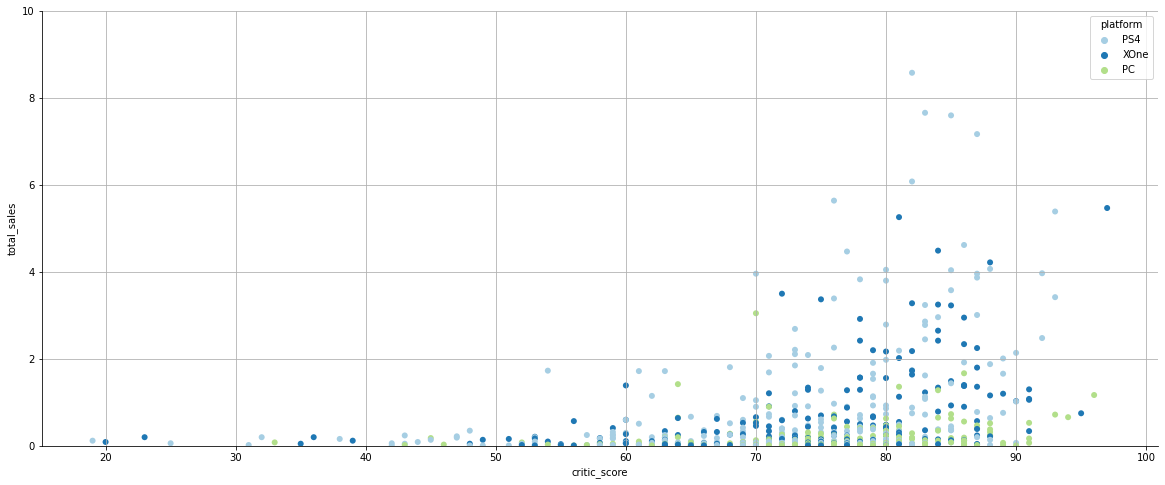

In [95]:
plt.figure(figsize = (20, 8))
sns.scatterplot(x = "critic_score", y = "total_sales",
                hue = "platform",
                palette = "Paired",
                sizes = (1, 8), linewidth = 0,
                data = top_platforms_rating_plot[top_platforms_rating_plot['platform'].isin(['PS4','PC','XOne'])])
plt.ylim(0, 10)
sns.despine()
plt.grid()
plt.show() 

**Вывод**

При анализе данных в разрезе по user_score и critic_score видно, что последний показатель сильнее влияет на объем продаж.
Во всех случаях есть игры, которые при низких оценках (как со стороны критиков, так и со стороны пользователей), добиваются высокого числа продаж.
В любом случае - оценка критиков важный параметр, который может помочь предсказать успех того или иного тайтла

Теперь посмотрим на тепловую карту корреляции между общими продажами и оценками для платформ PS4, PC, XOne

Создадим переменные, чтобы было проще строить тепловые карты для каждой платформы

In [96]:
top_three_platforms = top_platforms_rating_plot[top_platforms_rating_plot['platform'].isin(['PS4','PC','XOne'])]

pc_stats = top_three_platforms[(top_three_platforms['platform'] == 'PC')]
psfour_stats = top_three_platforms[top_three_platforms['platform'] == 'PS4']
xone_stats = top_three_platforms[top_three_platforms['platform'] == 'XOne']

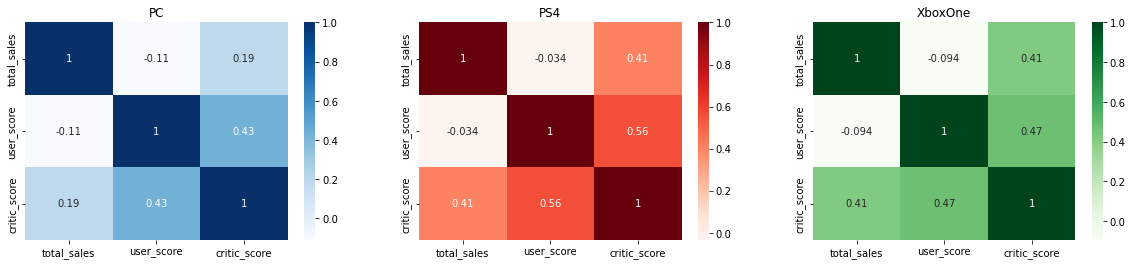

In [97]:
#Комментарий ревьювера
plt.figure(figsize = (20,4))
#PC heatmap
plt.subplot(1, 3, 1)

sns.heatmap(pc_stats[['total_sales', 'user_score', 'critic_score']].corr(), annot = True, cmap = 'Blues')
plt.title('PC')


#PS4 heatmap
plt.subplot(1, 3, 2)

sns.heatmap(psfour_stats[['total_sales', 'user_score', 'critic_score']].corr(), annot = True, cmap = 'Reds')
plt.title('PS4')

#XOne heatmap
plt.subplot(1, 3,3)
sns.heatmap(xone_stats[['total_sales', 'user_score', 'critic_score']].corr(), annot = True, cmap = 'Greens')
plt.title('XboxOne');

Что мы видим из построенных выше тепловых карт?

- На консолях (PS4 и XOne), зависимость между оценкой критиков и продажами силььнее, чем на ПК
- На всех платформах наблюдает негативная корреляция между продажами и оценками пользователей

### Какие жанры игр являются наиболее прибыльными?

Построим график используя данные по медианным продажам игр по жанрам

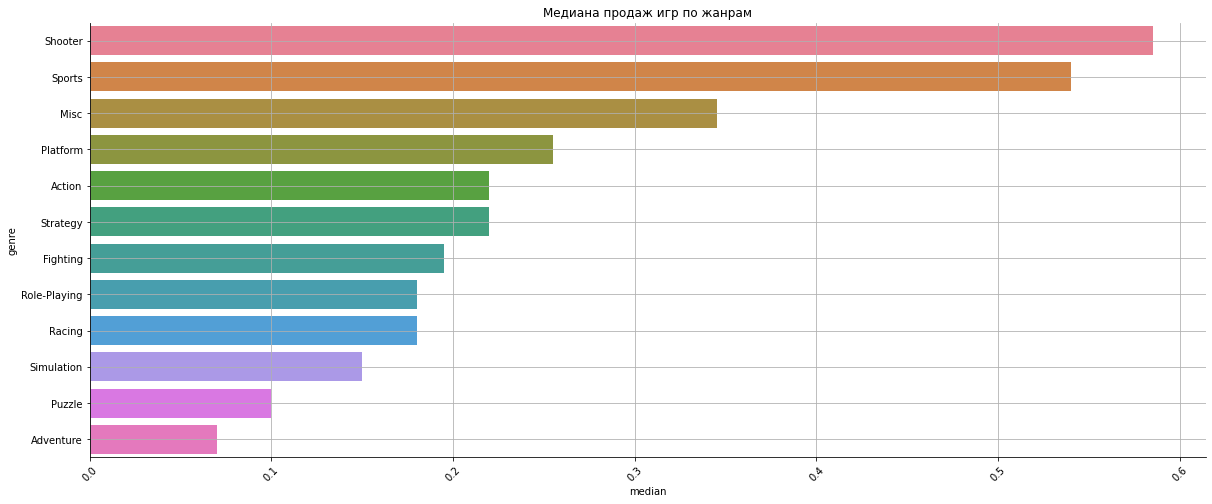

In [98]:
# сгруппируем данные по жанру
platform_genre_graph = top_platforms_rating_plot.pivot_table(index='genre', values='total_sales', aggfunc='median')
platform_genre_graph.columns = ['median']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_genre_graph = platform_genre_graph.sort_values('median', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (20, 8))
ax = sns.barplot(x = 'median', y =platform_genre_graph.index, \
                 data = platform_genre_graph, \
                 orient = 'h', palette = 'husl')
plt.title('Медиана продаж игр по жанрам')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

В тройку лидеров выходят:
- Shooter
- Sports
- Misc (Miscellaneous)

С заметным отрывом идут:
- Platform
- Action
- Strategy

Можно наблюдать сильное отставание у жанров Puzzle и Adventure

## Шаг 4. Портрет пользователей по регионам

Определим портрет для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [99]:
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76,8.000,E,82.540


### Самые популярные платформы по регионам

#### График для Северной Америки (NA)

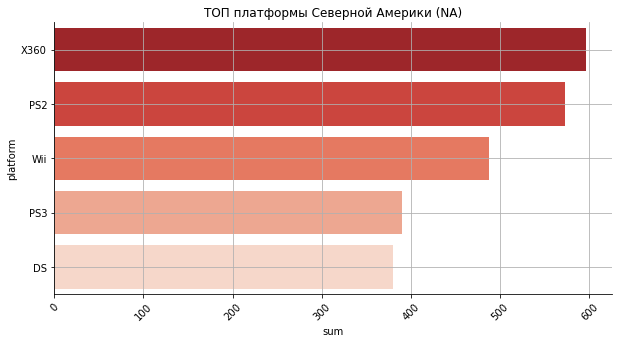

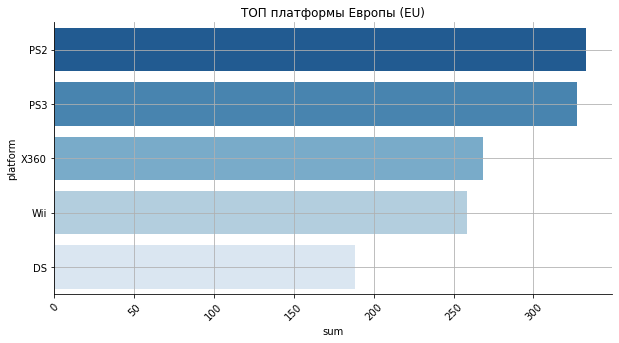

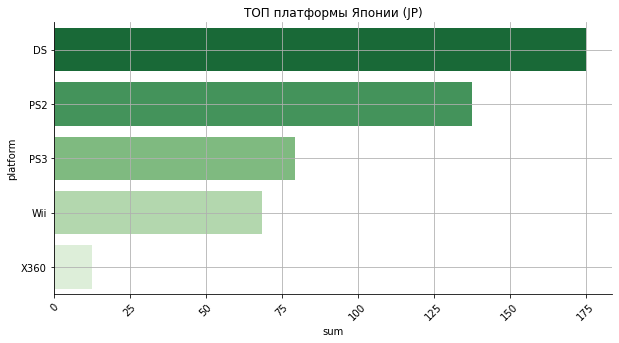

In [100]:
# NA
platform_na_sales = top_platforms.pivot_table(index='platform', values='na_sales', aggfunc='sum')
platform_na_sales.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_na_sales = platform_na_sales.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = 'sum', y =platform_na_sales.index, \
                 data = platform_na_sales, \
                 orient = 'h', palette = 'Reds_r')
plt.title('ТОП платформы Северной Америки (NA)')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

# EU
# сгруппируем данные по платформе
platform_eu_sales = top_platforms.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
platform_eu_sales.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_eu_sales = platform_eu_sales.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = 'sum', y =platform_eu_sales.index, \
                 data = platform_eu_sales, \
                 orient = 'h', palette = 'Blues_r')
plt.title('ТОП платформы Европы (EU)')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

#JP
# сгруппируем данные по платформе
platform_jp_sales = top_platforms.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
platform_jp_sales.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_jp_sales = platform_jp_sales.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn

f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = 'sum', y =platform_jp_sales.index, \
                 data = platform_jp_sales, \
                 orient = 'h', palette = 'Greens_r')
plt.title('ТОП платформы Японии (JP)')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

**Вывод**

В странах Северной Америки и Европы популярны похожие платформы, исключение - Wii, которая намного более популярна в Северной америке.

В Японии заметны существенные отличия, Здесь лидирует DS, а X360, находится в конце списка

### Самые популярные жанры по регионам

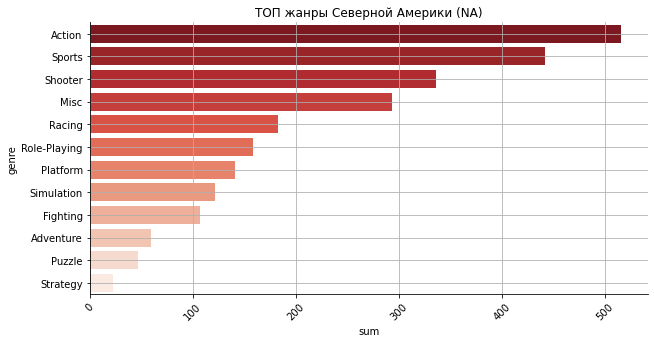

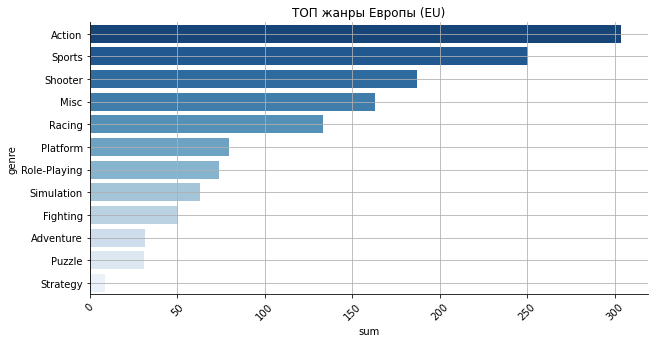

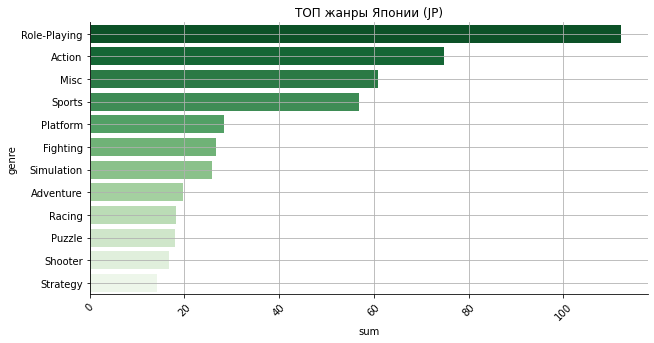

In [101]:
# NA
platform_na_genre = top_platforms.pivot_table(index='genre', values='na_sales', aggfunc='sum')
platform_na_genre.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_na_genre = platform_na_genre.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = 'sum', y =platform_na_genre.index, \
                 data = platform_na_genre, \
                 orient = 'h', palette = 'Reds_r')
plt.title('ТОП жанры Северной Америки (NA)')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

# EU
# сгруппируем данные по платформе
platform_eu_genre = top_platforms.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
platform_eu_genre.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_eu_genre = platform_eu_genre.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = 'sum', y =platform_eu_genre.index, \
                 data = platform_eu_genre, \
                 orient = 'h', palette = 'Blues_r')
plt.title('ТОП жанры Европы (EU)')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

#JP
# сгруппируем данные по платформе
platform_jp_genre = top_platforms.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
platform_jp_genre.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_jp_genre = platform_jp_genre.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = 'sum', y =platform_jp_genre.index, \
                 data = platform_jp_genre, \
                 orient = 'h', palette = 'Greens_r')
plt.title('ТОП жанры Японии (JP)')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

**Вывод**

Картины по жанрам в Северной Амрерике и Европе выглядят похожими. Это может быть резулььтатом того, что у двух регионов схожий культурный код. Большенсво игр выпускают в странах вропы и Северной Америке, таким образом, эти страны в той или иной степен задают тренд по популярным жанрам.

В Обоих регионах в ТПО входят жанры  Action, Shooter, Sports. Это свидетельствует о том, что глобальные тренды индустрии остаются актуальными в не зависимости от региона

В Японии пользуются популярностью ролевые игры

### Игры с каким рейтингом лидируют в регионах?

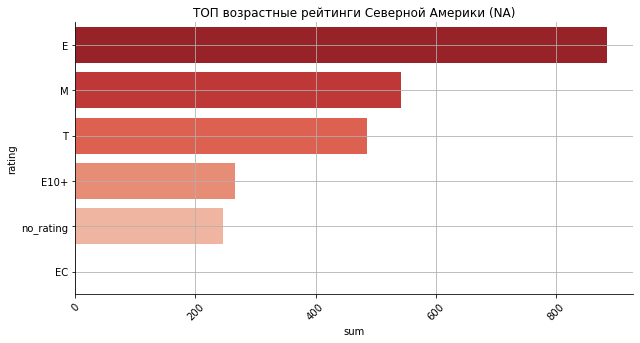

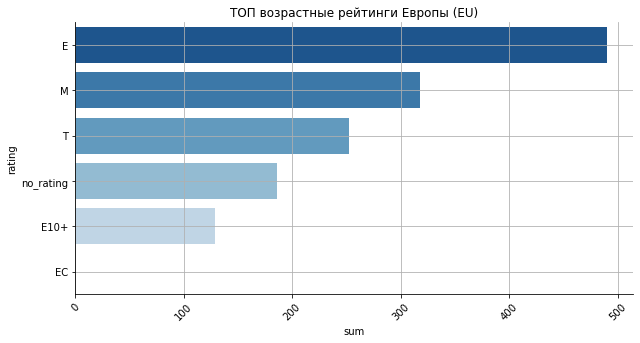

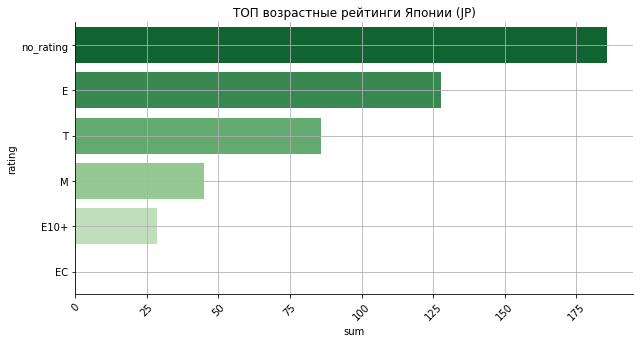

In [102]:
# NA
platform_na_rating = top_platforms.pivot_table(index='rating', values='na_sales', aggfunc='sum')
platform_na_rating.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_na_rating = platform_na_rating.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = 'sum', y =platform_na_rating.index, \
                 data = platform_na_rating, \
                 orient = 'h', palette = 'Reds_r')
plt.title('ТОП возрастные рейтинги Северной Америки (NA)')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

# EU
# сгруппируем данные по платформе
platform_eu_rating = top_platforms.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
platform_eu_rating.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_eu_rating = platform_eu_rating.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = 'sum', y =platform_eu_rating.index, \
                 data = platform_eu_rating, \
                 orient = 'h', palette = 'Blues_r')
plt.title('ТОП возрастные рейтинги Европы (EU)')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

#JP
# сгруппируем данные по платформе
platform_jp_rating = top_platforms.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
platform_jp_rating.columns = ['sum']

# отсортируем данные в переменной, чтобы получить более наглядный график
platform_jp_rating = platform_jp_rating.sort_values('sum', ascending = False)

# построим график с помощью библиотеки seaborn
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = 'sum', y =platform_jp_rating.index, \
                 data = platform_jp_rating, \
                 orient = 'h', palette = 'Greens_r')
plt.title('ТОП возрастные рейтинги Японии (JP)')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

**Вывод**

В Северной Америке и Европе практически одинаковая картина по популярности жанров. Можно предположить, что это объясняется схожей демографией регионов и похожим культурным кодом

В Японии лидируют игры, у которых не определен возрастной рейтинг. Это может свидетельствовать о том, что в регионе много нишевых игр, которые не получили оценки по рейтингу

Во всех регионах игры с рейтингом E (Everyone - для всех возрастов) занимают высокую позицию

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H1** - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H0** - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Для начала, уберем из датасета все значения -1 т.к. мы использовали его для как заглушку

In [103]:
XOne_hypothesis_test = df[(df['platform'] == 'XOne') & (df['user_score'] >= 0)]
XOne_hypothesis_test = XOne_hypothesis_test.groupby('name')['user_score'].sum()

PC_hypothesis_test = df[(df['platform'] == 'PC') & (df['user_score'] >= 0)]
PC_hypothesis_test = PC_hypothesis_test.groupby('name')['user_score'].sum()

alpha = 0.05
results = ttest_ind(XOne_hypothesis_test, PC_hypothesis_test)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.4508752289661644e-05
Отвергаем нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные


**H1** - Средние пользовательские рейтинги жанров Action и Sports разные

**H0** - Средние пользовательские рейтинги жанров Action и Sports равны

In [104]:
action_hypothesis_test = df[(df['genre'] == 'Action') & (df['user_score'] >= 0)]
action_hypothesis_test = action_hypothesis_test.groupby('name')['user_score'].sum()

sports_hypothesis_test = df[(df['genre'] == 'Sports') & (df['user_score'] >= 0)]
sports_hypothesis_test = sports_hypothesis_test.groupby('name')['user_score'].sum()

alpha = 0.05
results = ttest_ind(action_hypothesis_test, sports_hypothesis_test)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.9382647423639257
Не получилось отвергнуть нулевую гипотезу


Получется, средние пользовательские рейтинги у данных жанров схожи

## Шаг 6. Общий вывод

Мы видим, что игровой рынок отличается от региона к региону. Различаются предпочтения в платформах, жанрах и влияние возрастных рейтингов. Несмотря на это, во всех регионах отслеживаются общие, глобальные тренды.

Наибольшее влияние на продажи оказывают рейтинги критиков.

За последние 20 лет, число популярных платформ сильно снизилось. Индустрия стремится к некоторой унификации, т.е. системе, где существует несколько консолей и PC.

Также важно отметить, что мы анализируем именно. игра для консолей и PC, не учитывая быстрорастущий рынок мобильных игр.
Учитывая этот факт, можно объяснить тенденцию к снижающимся продажам и число релизов на платформах с годами.